In [11]:
%run init.ipynb

## Swap de estados

$$\text{ O traço é}
$$

\begin{equation} Tr(A)  = \sum_jA_{jj} = \sum_j\langle\psi_j|A|\psi_j\rangle
\end{equation}
$$\text{Onde $\psi_j$ é uma base qualquer do espaço onde a matriz A está definida.}
$$

$$\text{ O traço parcial é }
$$

Essa função utiliza uma base específica para realizar o traço, ela utiliza a base da parte B e com isso é obtido o operador densidade apenas da parte A.

\begin{equation} \rho_A = Tr_B(\rho_{AB})  = \sum_j^{dB}\left(I\otimes\langle B_j|\right)\rho_{AB}\left(|B_j\rangle\otimes I\right)
\end{equation}
\begin{equation} \rho_B = Tr_A(\rho_{AB})  = \sum_j^{dA}\left(I\otimes\langle A_j|\right)\rho_{AB}\left(|A_j\rangle\otimes I\right)
\end{equation}

In [12]:
X = Matrix([[0,1],[1,0]]); Y = Matrix([[0,-1j],[1j,0]]); Z = Matrix([[1,0],[0,-1]]); I = Matrix([[1,0],[0,1]])
xa,ya,za,xb,yb,zb = symbols('x_a y_a z_a x_b y_b z_b')
xx,xy,xz,yx,yy,yz,zx,zy,zz = symbols('xx xy xz yx yy yz zx zy zz')
rho_ab = (1/4)*(tp(I,I) + xa*tp(X,I) + ya*tp(Y,I) + za*tp(Z,I) + xb*tp(I,X) + yb*tp(I,Y) + zb*tp(I,Z))
rho_ab += (1/4)*(xx*tp(X,X) + xy*tp(X,Y) + xz*tp(X,Z) + yx*tp(Y,X) + yy*tp(Y,Y) + yz*tp(Y,Z))
rho_ab += (1/4)*(zx*tp(Z,X) + xy*tp(Z,Y) + zz*tp(Z,Z))
rho_ab

⎡    0.25⋅zₐ + 0.25⋅z_b + 0.25⋅zz + 0.25      0.25⋅x_b - 0.25⋅ⅈ⋅xy - 0.25⋅ⅈ⋅y_
⎢                                                                             
⎢0.25⋅x_b + 0.25⋅ⅈ⋅xy + 0.25⋅ⅈ⋅y_b + 0.25⋅zx      0.25⋅zₐ - 0.25⋅z_b - 0.25⋅zz
⎢                                                                             
⎢ 0.25⋅xₐ + 0.25⋅xz + 0.25⋅ⅈ⋅yₐ + 0.25⋅ⅈ⋅yz    0.25⋅xx - 0.25⋅ⅈ⋅xy + 0.25⋅ⅈ⋅yx
⎢                                                                             
⎣ 0.25⋅xx + 0.25⋅ⅈ⋅xy + 0.25⋅ⅈ⋅yx - 0.25⋅yy    0.25⋅xₐ - 0.25⋅xz + 0.25⋅ⅈ⋅yₐ -

b + 0.25⋅zx   0.25⋅xₐ + 0.25⋅xz - 0.25⋅ⅈ⋅yₐ - 0.25⋅ⅈ⋅yz    0.25⋅xx - 0.25⋅ⅈ⋅xy
                                                                              
 + 0.25       0.25⋅xx + 0.25⋅ⅈ⋅xy - 0.25⋅ⅈ⋅yx + 0.25⋅yy    0.25⋅xₐ - 0.25⋅xz -
                                                                              
 + 0.25⋅yy      -0.25⋅zₐ + 0.25⋅z_b - 0.25⋅zz + 0.25      0.25⋅x_b + 0.25⋅ⅈ⋅xy
                                                   

In [13]:
import numpy as np

def ptraceA(da, db, rho):
    rhoB = np.zeros((db,db),dtype='complex')
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
                print(j,k,l)
    return rhoB
def ptraceB(da, db, rho):
    rhoA = np.zeros((da,da))
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

In [14]:
rho_a = ptraceB(2, 2, rho_ab); rho_a

TypeError: can't convert expression to float

In [15]:
%run init2.ipynb
#from rpvg import rpv_zhsl
#from rug import ru_gram_schmidt
#from distances import normHS2
#import mat_func as mf
#import random

In [16]:
rho_ab=rdm_ginibre(4)
print(rho_ab)
rho_a = pTraceL(2, 2, rho_ab); rho_a

[[ 0.17750371+0.j          0.16671802-0.02896075j -0.00135958+0.03839804j
  -0.05511226-0.0470979j ]
 [ 0.16671802+0.02896075j  0.28781737+0.j          0.05149381+0.16451388j
  -0.06390804-0.12680099j]
 [-0.00135958-0.03839804j  0.05149381-0.16451388j  0.410073  +0.j
  -0.04232841+0.04081549j]
 [-0.05511226+0.0470979j  -0.06390804+0.12680099j -0.04232841-0.04081549j
   0.12460592+0.j        ]]


array([[0.58757671+0.j        , 0.12438961+0.01185475j],
       [0.12438961-0.01185475j, 0.41242329+0.j        ]])

### Exemplo dado em aula

#### Simulação e implementação experimental da troca de estados

\begin{align}
& \rho_{a} = |0\rangle\langle 0| = \begin{bmatrix}1&0\\0&0 \end{bmatrix}, \\
& \rho_{b} = |\oplus\rangle\langle \oplus| = \begin{bmatrix}1/2&-i/2\\i/2&1/2 \end{bmatrix}.
\end{align}

In [67]:
import qiskit
a=qiskit.quantum_info.Statevector.from_label('0')
print(a)
qiskit.quantum_info.Statevector.draw(a)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


AttributeError: type object 'Statevector' has no attribute 'draw'

In [28]:
from numpy import sqrt
from qiskit.quantum_info import Statevector
sv=Statevector.from_label('+')
sv.draw(output='latex')

AttributeError: 'Statevector' object has no attribute 'draw'

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


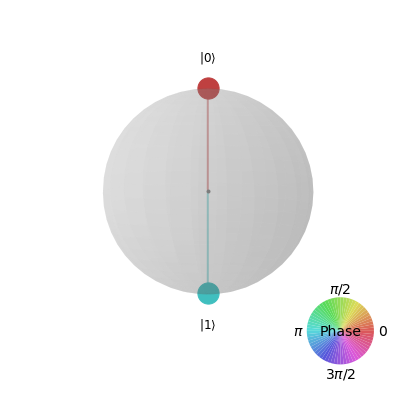

In [65]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
sv=Statevector.from_label('-')
print(sv)
plot_state_qsphere(sv)

#sv=Statevector.from_label('+')
#sv.draw(output='latex')
#Statevector.draw(sv)

In [81]:
sv=Statevector.from_label('01')
qc = QuantumCircuit(2)
qc.cx(1,0)
qc.cx(0,1)
qc.cx(1,0)
new_sv = sv.evolve(qc)
qc.draw(output='mpl')
print('sv = ',sv)
print('sv = ',new_sv)

sv =  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
sv =  Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


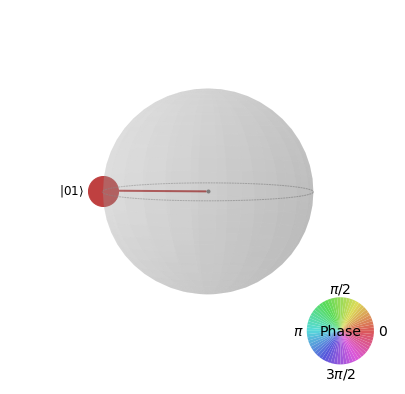

In [82]:
plot_state_qsphere(sv)

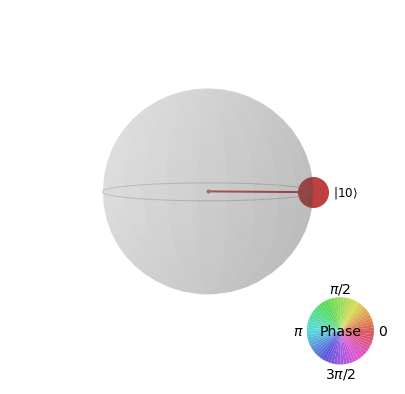

In [83]:
plot_state_qsphere(new_sv)

In [109]:
def swap(sv):
    qc = QuantumCircuit(2)
    qc.cx(1,0)
    qc.cx(0,1)
    qc.cx(1,0)
    new_sv = sv.evolve(qc)
    return new_sv
sv = Statevector.from_label('01')
new_sv = swap(sv)
print('sv = ',sv)
print('new_sv = ',new_sv)

sv =  Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))
new_sv =  Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


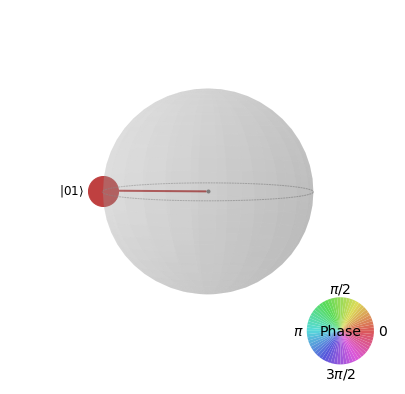

In [108]:
plot_state_qsphere(sv)

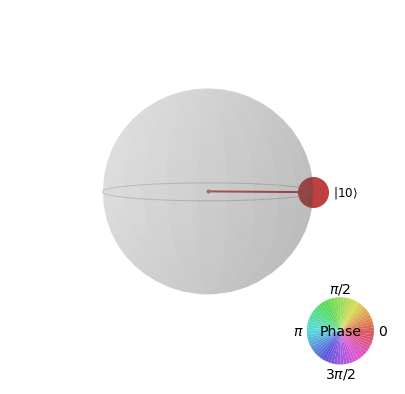

In [110]:
plot_state_qsphere(new_sv)

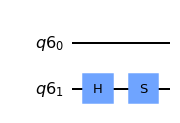

In [111]:
qr = QuantumRegister(2); qc = QuantumCircuit(qr)
sv=Statevector.from_label('00')
qc.h(qr[1]); qc.s(qr[1]);
new_sv = sv.evolve(qc)
qc.draw(output='mpl')

In [113]:
new_sv

Statevector([0.70710678+0.j        , 0.        +0.j        ,
             0.        +0.70710678j, 0.        +0.j        ],
            dims=(2, 2))

In [114]:
nshots = 8192
qstc = state_tomography_circuits(qc, [qr[0],qr[1]]);
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoBA = qstf.fit(method='lstsq'); # extrai o operador densidade
rhoBA 

array([[ 4.95177251e-01+0.j        , -9.34152980e-04+0.00110308j,
        -2.82761631e-03-0.49624294j,  7.29199186e-04+0.0010693j ],
       [-9.34152980e-04-0.00110308j,  1.25084647e-03+0.j        ,
        -2.12135322e-03-0.00133498j,  7.76465411e-07-0.00124908j],
       [-2.82761631e-03+0.49624294j, -2.12135322e-03+0.00133498j,
         5.02324267e-01+0.j        ,  1.19968879e-03+0.0017445j ],
       [ 7.29199186e-04-0.0010693j ,  7.76465411e-07+0.00124908j,
         1.19968879e-03-0.0017445j ,  1.24763563e-03+0.j        ]])

In [115]:
rhoA = pTraceL(2, 2, rhoBA);
rhoB = pTraceR(2,2, rhoBA);
print(trace(2,rhoA))
print(trace(2,rhoB))
print(trace(4,rhoBA))

(1+0j)
(1+0j)
(1+0j)


In [116]:
rhoA

array([[9.97501518e-01+0.j        , 2.65535809e-04+0.00284758j],
       [2.65535809e-04-0.00284758j, 2.49848211e-03+0.j        ]])

In [117]:
rhoB

array([[ 0.4964281 +0.j        , -0.00282684-0.49749202j],
       [-0.00282684+0.49749202j,  0.5035719 +0.j        ]])

#### Swap de estados

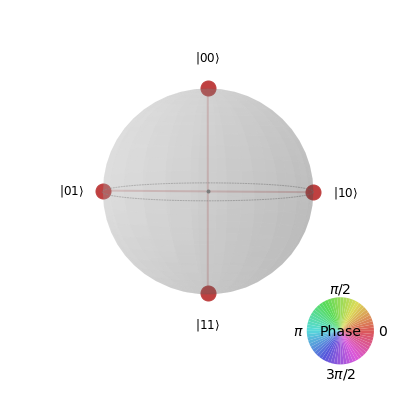

In [80]:
dims=4
size = np.product(dims)
state = np.zeros(size, dtype=complex)
state[1] = 1.0
#SV=Statevector(state, dims=dims)
SV=Statevector([1,1,1,1], dims=4)
plot_state_qsphere(SV)

In [ ]:
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_quito')
from qiskit.tools.monitor import job_monitor
job = qiskit.execute(qstc, backend = device, shots = nshots)
print(job.job_id()); job_monitor(job)
qstf = StateTomographyFitter(job.result(), qstc)
rho = qstf.fit(method='lstsq'); rho